In [1]:
import my_tools as mt
import planet_utils as pu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imp
import cv2
imp.reload(mt)
imp.reload(pu)
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_set = mt.train_set
label_map = mt.label_map
inv_label_map = mt.inv_label_map
Y = mt.get_y(train_set['tags'].values)
tags = [inv_label_map[i] for i in range(Y.shape[1])]
ydf = pd.DataFrame(Y, columns=tags)

In [3]:
subt = pd.read_csv('./submit/170620_01.csv')
subt['tags'] = subt['tags'].apply(lambda x: x.split(' '))
subt_y = mt.get_y(subt['tags'].values)
subt_df = pd.DataFrame(subt_y, columns=tags)

In [4]:
def plot_sampletag(Y):
    sample_tagnum = Y.sum(axis=1)
    sample_tagsum = np.zeros(18)
    for i in range(18):
        sample_tagsum[i] = (sample_tagnum == i).sum()
    pos = np.arange(18)

    fig, ax = plt.subplots(figsize=(16,6), edgecolor='r')
    ax.bar(pos, sample_tagsum, align='center', color='#CC5B58', width=0.6, edgecolor='w')
    ax.set_xticks(pos)
    #ax.set_xticklabels(tags, rotation=45, size='x-large', horizontalalignment='right', verticalalignment='top')
    ax.set_xlim(-1, 18)
    for i in range(sample_tagsum.size):
        ax.text(pos[i], sample_tagsum[i] + 50, str(sample_tagsum[i]), horizontalalignment='center', verticalalignment='bottom')
        ax.text(pos[i], sample_tagsum[i] + 800, str(round(sample_tagsum[i]*100/sample_tagsum.sum(), 2))+'%', horizontalalignment='center', verticalalignment='bottom')
    ax.set_title('Numbers of Samples\' Tags', fontsize=18)

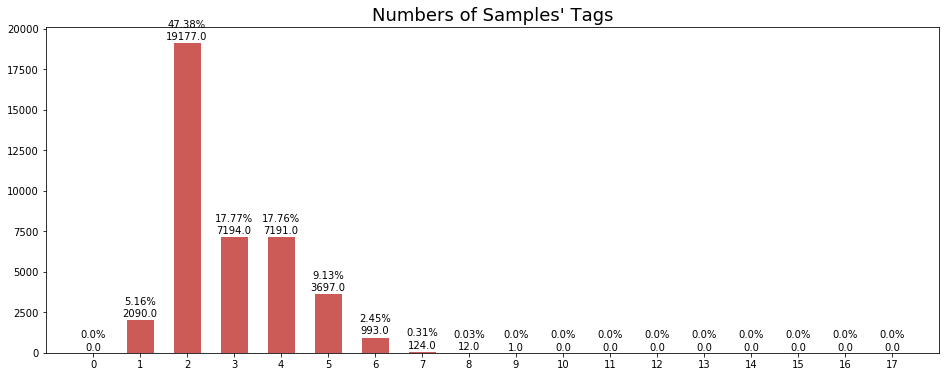

In [5]:
plot_sampletag(Y)

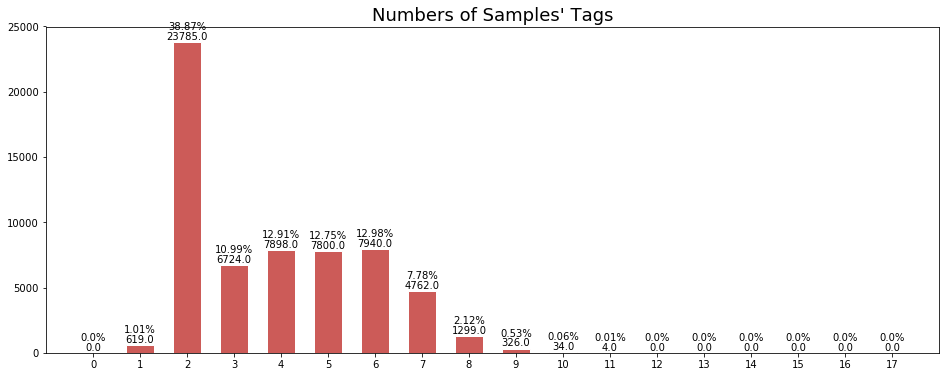

In [17]:
plot_sampletag(subt_y)

In [79]:
pred_ts = np.load('./preds/170620_01_pred_ts.npy')
subt_5 = pu.to_01(pred_ts, np.zeros(17)+0.5, mt.test_set)
subt5_df = pd.DataFrame(subt_5, columns=tags)
subt_3 = pu.to_01(pred_ts, np.zeros(17)+0.3, mt.test_set)
subt3_df = pd.DataFrame(subt_3, columns=tags)
pred_tr = np.load('./preds/170620_01_pred_tr.npy')
tr_5 = pu.to_01(pred_tr, np.zeros(17)+0.5, mt.train_set)
tr_3 = pu.to_01(pred_tr, np.zeros(17)+0.3, mt.train_set)
th_b = np.array([ 0.07,  0.05,  0.12,  0.02,  0.06,  0.12,  0.11,  0.1 ,  0.14, 0.12,  0.12,  0.17,  0.1 ,  0.2 ,  0.64,  0.1 ,  0.19])
tr_b = pu.to_01(pred_tr, th_b, mt.train_set)

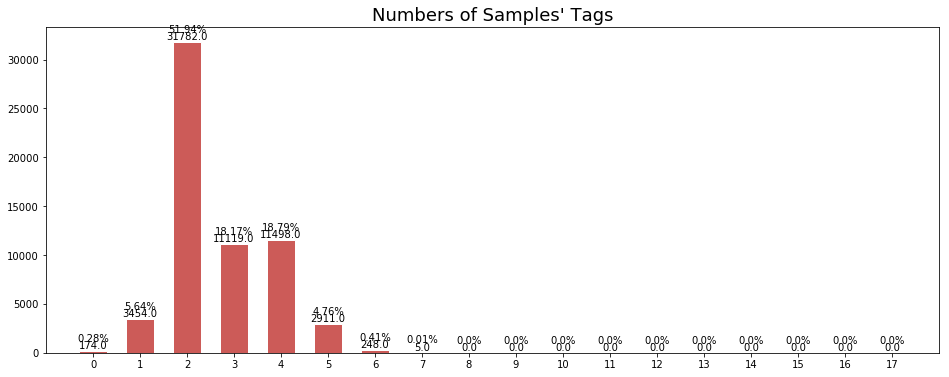

In [26]:
plot_sampletag(subt_5)

In [6]:
def plot_tagnum(Y):
    tags_sum = Y.sum(axis=0)
    # tags_sum.sort()
    tags = [inv_label_map[i] for i in range(tags_sum.size)]
    pos = np.arange(tags_sum.size)

    fig, ax = plt.subplots(figsize=(16,6), edgecolor='r')
    ax.bar(pos, tags_sum, align='center', color='#7FB1B7', width=0.6, edgecolor='w')
    ax.set_xticks(pos)
    ax.set_xticklabels(tags, rotation=45, size='x-large', horizontalalignment='right', verticalalignment='top')
    ax.set_xlim(-1, 17)
    for i in range(tags_sum.size):
        ax.text(pos[i], tags_sum[i] + 200, str(tags_sum[i]), horizontalalignment='center', verticalalignment='bottom')
        ax.text(pos[i], tags_sum[i] + 2000, str(round(tags_sum[i]*100/Y.shape[0], 2))+'%', horizontalalignment='center', verticalalignment='bottom')
    ax.set_title('Numbers of Tags', fontsize=18)

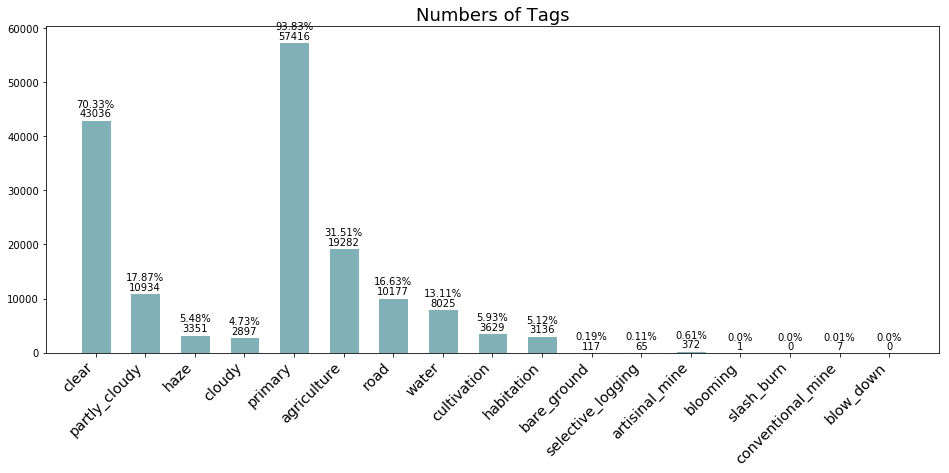

In [33]:
plot_tagnum(subt_5)

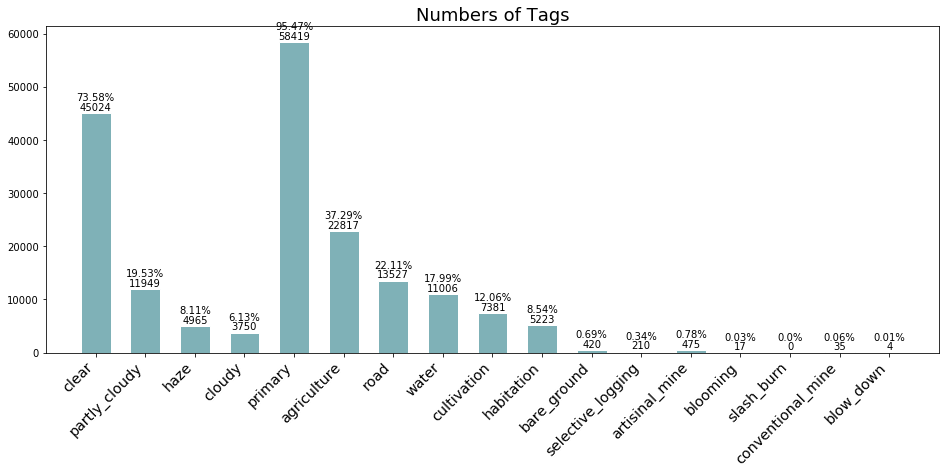

In [35]:
plot_tagnum(subt_3)

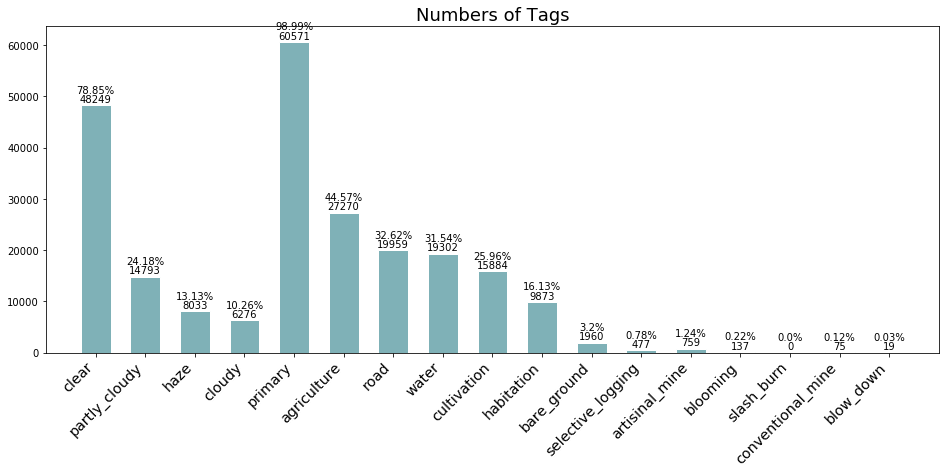

In [31]:
plot_tagnum(subt_y)

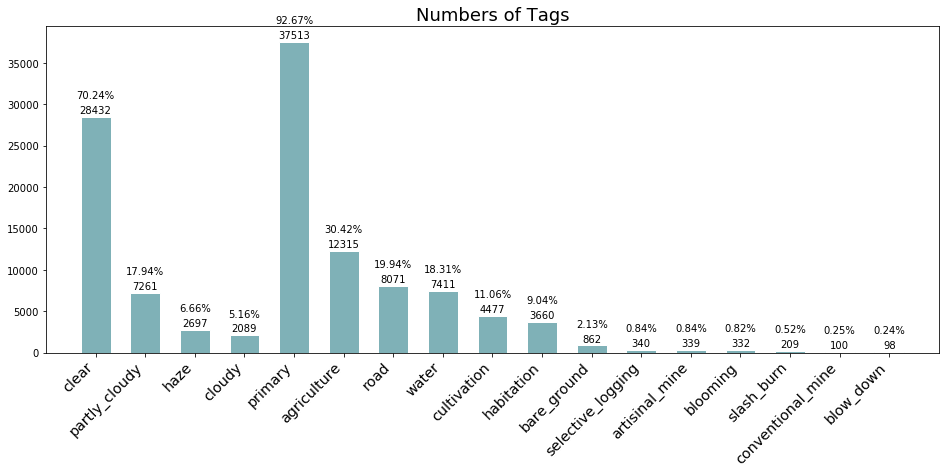

In [7]:
plot_tagnum(Y)

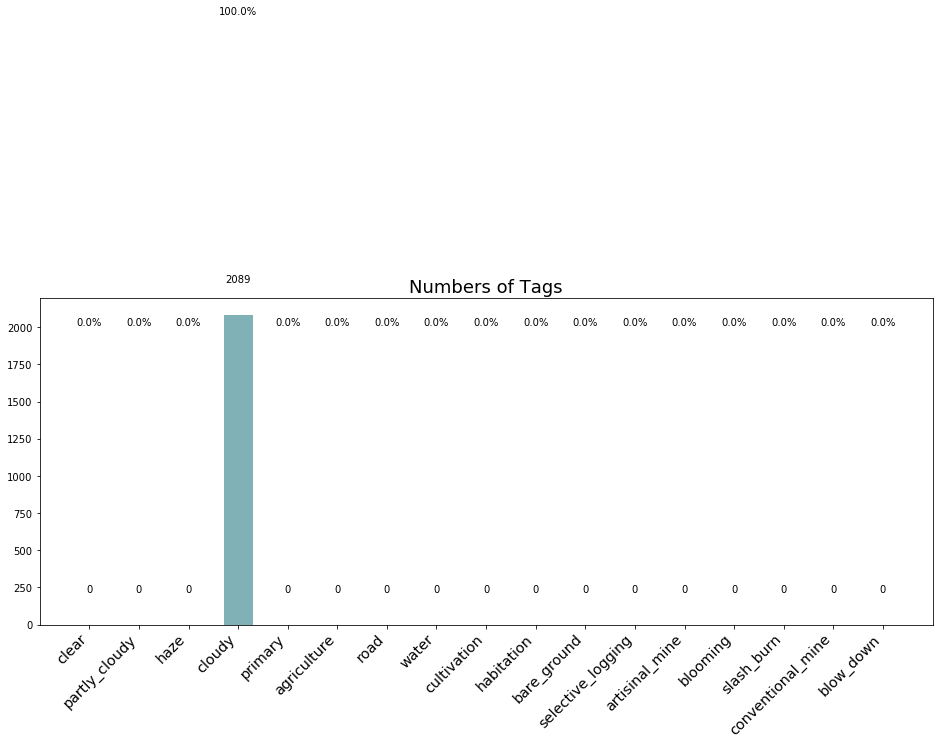

In [15]:
plot_tagnum(Y[Y[:, 3]==1,:])

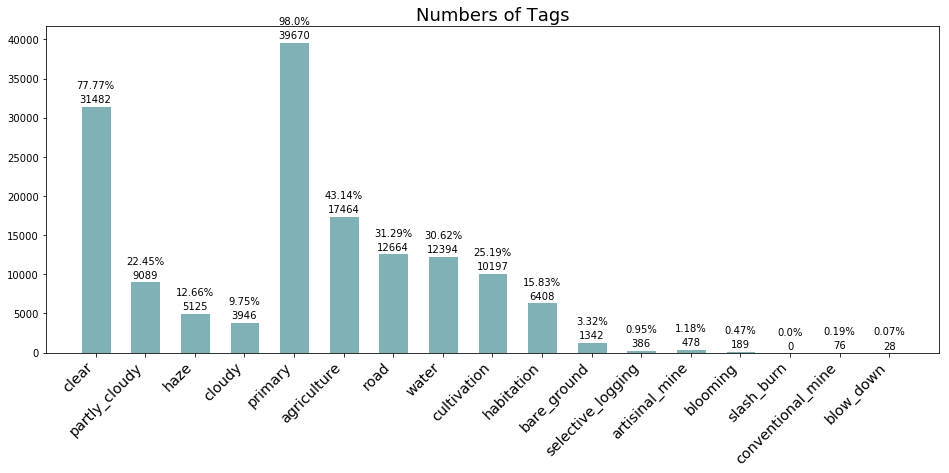

In [40]:
plot_tagnum(tr_b)

In [6]:
from scipy import stats
from matplotlib import cm

def plot_corr(tag=None, value=None):
    if tag == None:
        new_Y = Y
    else:
        new_Y = ydf.loc[ydf[tag] == value, :].values
    corrs = np.zeros((17,17))
    for i in range(17):
        for j in range(i):
            corrs[i,j], p = stats.spearmanr(new_Y[:, i], new_Y[:, j])

    pos = np.arange(new_Y.shape[1])
    tags = [inv_label_map[i] for i in range(new_Y.shape[1])]
    fig, ax = plt.subplots(figsize=(10,10), edgecolor='r')
    im = ax.imshow(corrs, cmap=cm.RdBu_r)
    ax.set_xticks(pos)
    ax.set_xticklabels(tags, rotation=45, size='large', horizontalalignment='right', verticalalignment='top')
    ax.set_yticks(pos)
    ax.set_yticklabels(tags, size='large')
    ax.set_title("Correlation between Two-tags when {0}=={1}".format(tag, value), size='xx-large')
    im.set_clim(-1, 1)
    fig.colorbar(im, fraction=0.046, pad=0.04)

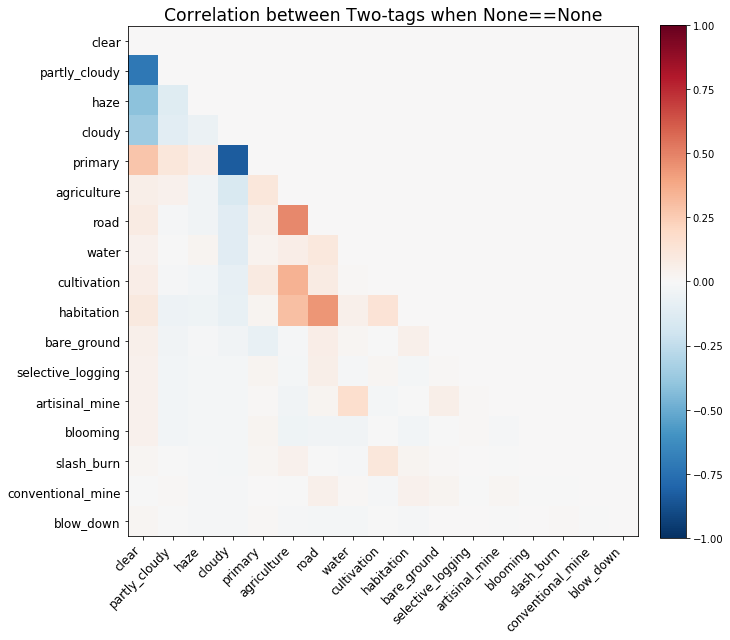

In [7]:
plot_corr()

In [46]:
def mutex(ydf, t):
    for i in range(17):
        print(inv_label_map[i], '=1:')
        s = ydf.loc[ydf[inv_label_map[i]] == 1,:].sum()
        print(ydf.columns[s <= t].tolist())
        print(inv_label_map[i], '=0:')
        s = ydf.loc[ydf[inv_label_map[i]] == 0,:].sum()
        print(ydf.columns[s <= t].tolist())
        print('>>>>>>>>>>>>>>>>>>')

In [47]:
mutex(ydf, 0)

clear =1:
['partly_cloudy', 'haze', 'cloudy']
clear =0:
['clear']
>>>>>>>>>>>>>>>>>>
partly_cloudy =1:
['clear', 'haze', 'cloudy']
partly_cloudy =0:
['partly_cloudy']
>>>>>>>>>>>>>>>>>>
haze =1:
['clear', 'partly_cloudy', 'cloudy', 'blow_down']
haze =0:
['haze']
>>>>>>>>>>>>>>>>>>
cloudy =1:
['clear', 'partly_cloudy', 'haze', 'primary', 'agriculture', 'road', 'water', 'cultivation', 'habitation', 'bare_ground', 'selective_logging', 'artisinal_mine', 'blooming', 'slash_burn', 'conventional_mine', 'blow_down']
cloudy =0:
['cloudy']
>>>>>>>>>>>>>>>>>>
primary =1:
['cloudy']
primary =0:
['primary', 'selective_logging', 'blooming', 'slash_burn', 'blow_down']
>>>>>>>>>>>>>>>>>>
agriculture =1:
['cloudy']
agriculture =0:
['agriculture']
>>>>>>>>>>>>>>>>>>
road =1:
['cloudy']
road =0:
['road']
>>>>>>>>>>>>>>>>>>
water =1:
['cloudy']
water =0:
['water']
>>>>>>>>>>>>>>>>>>
cultivation =1:
['cloudy']
cultivation =0:
['cultivation']
>>>>>>>>>>>>>>>>>>
habitation =1:
['cloudy']
habitation =0:
['hab

In [50]:
mutex(subt_df, 0)

clear =1:
['slash_burn']
clear =0:
['clear', 'blooming', 'slash_burn', 'blow_down']
>>>>>>>>>>>>>>>>>>
partly_cloudy =1:
['slash_burn', 'blow_down']
partly_cloudy =0:
['partly_cloudy', 'slash_burn']
>>>>>>>>>>>>>>>>>>
haze =1:
['blooming', 'slash_burn', 'blow_down']
haze =0:
['haze', 'slash_burn']
>>>>>>>>>>>>>>>>>>
cloudy =1:
['selective_logging', 'blooming', 'slash_burn', 'conventional_mine', 'blow_down']
cloudy =0:
['cloudy', 'slash_burn']
>>>>>>>>>>>>>>>>>>
primary =1:
['slash_burn']
primary =0:
['clear', 'partly_cloudy', 'haze', 'primary', 'agriculture', 'road', 'cultivation', 'habitation', 'bare_ground', 'selective_logging', 'artisinal_mine', 'blooming', 'slash_burn', 'conventional_mine', 'blow_down']
>>>>>>>>>>>>>>>>>>
agriculture =1:
['slash_burn']
agriculture =0:
['agriculture', 'slash_burn', 'conventional_mine', 'blow_down']
>>>>>>>>>>>>>>>>>>
road =1:
['slash_burn']
road =0:
['road', 'slash_burn', 'conventional_mine']
>>>>>>>>>>>>>>>>>>
water =1:
['slash_burn', 'blow_down']


In [65]:
#clear, partly_cloudy, cloudy, haze
ydf.shape[0], ydf.loc[ydf['clear'] == 1,:].shape[0] + ydf.loc[ydf['partly_cloudy'] == 1,:].shape[0] + ydf.loc[ydf['cloudy'] == 1,:].shape[0] + ydf.loc[ydf['haze'] == 1,:].shape[0]

(40479, 40479)

In [ ]:
blooming 和 conventional_mine +artisinal_mine

J:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
J:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
J:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
J:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
J:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


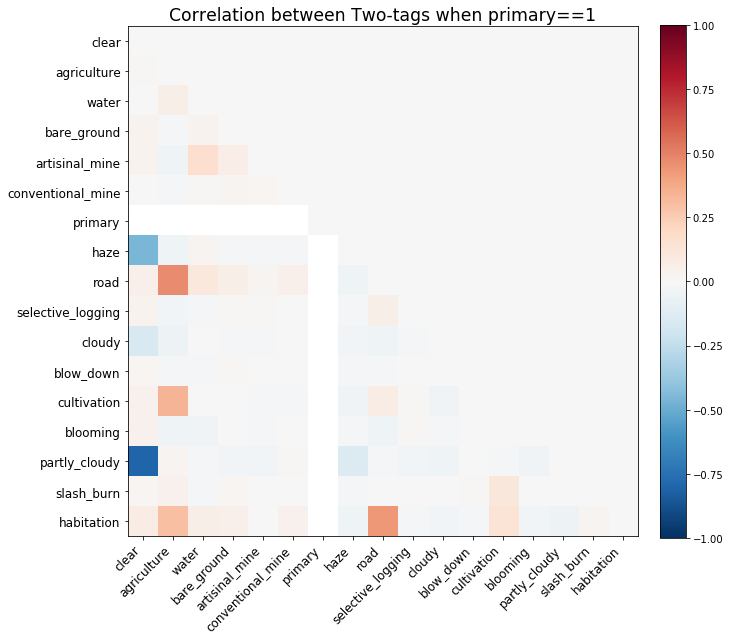

In [209]:
plot_corr('primary', 1)

J:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
J:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
J:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
J:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
J:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


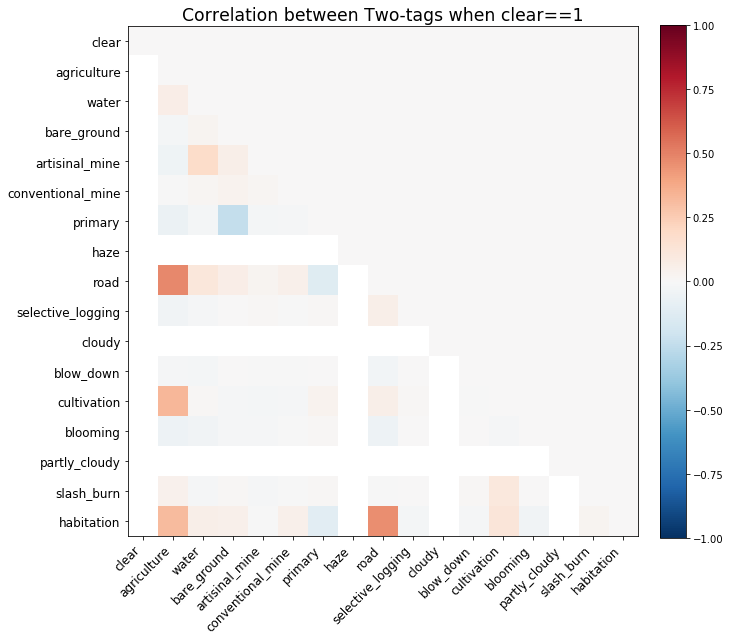

In [212]:
plot_corr('clear', 1)

In [105]:
from matplotlib import cm
def plot_ratio_diff():
    rds = np.zeros((17,17))
    for i in range(17):
        p1 = ydf.loc[ydf[inv_label_map[i]] == 1,:].sum() /ydf.sum()
        p0 = ydf.loc[ydf[inv_label_map[i]] == 0,:].sum() /ydf.sum()
        rds[i, :] = np.abs(p1 - p0)

    pos = np.arange(Y.shape[1])
    tags = [inv_label_map[i] for i in range(Y.shape[1])]
    fig, ax = plt.subplots(figsize=(10,10), edgecolor='r')
    im = ax.imshow(rds, cmap=cm.RdBu_r)
    ax.set_xticks(pos)
    ax.set_xticklabels(tags, rotation=45, size='large', horizontalalignment='right', verticalalignment='top')
    ax.set_yticks(pos)
    ax.set_yticklabels(tags, size='large')
#     ax.set_title("Chi2 Value between Two-tags", size='xx-large')
#     im.set_clim(0, 1)
    fig.colorbar(im, fraction=0.046, pad=0.04)

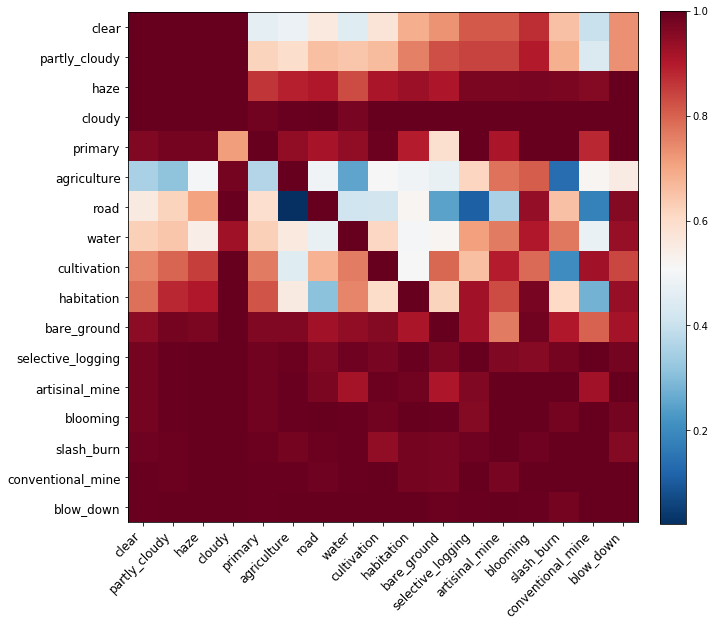

In [106]:
plot_ratio_diff()

In [107]:
from scipy.stats import chi2
def chi2_rxc(xtab, verbose=1):
    n = xtab.sum()
    nc = xtab.sum(axis=0)
    nr = xtab.sum(axis=1)
    T = ((np.ones_like(xtab) * nc).T * nr).T / n
    _chi2 = ((xtab - T) ** 2 / T).sum()
    _df = (xtab.shape[0] - 1) * (xtab.shape[1] - 1)
    _p = chi2.sf(_chi2, _df)
    return _chi2, _df, _p


# xtab = confusion_matrix(ydf['clear'].values, ydf['haze'].values)
# print(chi2_rxc(xtab, verbose=0))
# xtab = confusion_matrix(ydf['road'].values, ydf['agriculture'].values)
# print(xtab)
# print(chi2_rxc(xtab, verbose=0))

from sklearn.metrics import confusion_matrix
from matplotlib import cm
def plot_chi2_2x2():
    chi2s = np.zeros((17,17))
    for i in range(17):
        for j in range(i):
            xtab = confusion_matrix(Y[:, i], Y[:, j])
            chi2s[i, j], _, _ = chi2_rxc(xtab, verbose=0)

    pos = np.arange(Y.shape[1])
    tags = [inv_label_map[i] for i in range(Y.shape[1])]
    fig, ax = plt.subplots(figsize=(10,10), edgecolor='r')
    im = ax.imshow(chi2s, cmap=cm.cool)
    ax.set_xticks(pos)
    ax.set_xticklabels(tags, rotation=45, size='large', horizontalalignment='right', verticalalignment='top')
    ax.set_yticks(pos)
    ax.set_yticklabels(tags, size='large')
    ax.set_title("Chi2 Value between Two-tags", size='xx-large')
#     im.set_clim(-1, 1)
    fig.colorbar(im, fraction=0.046, pad=0.04)

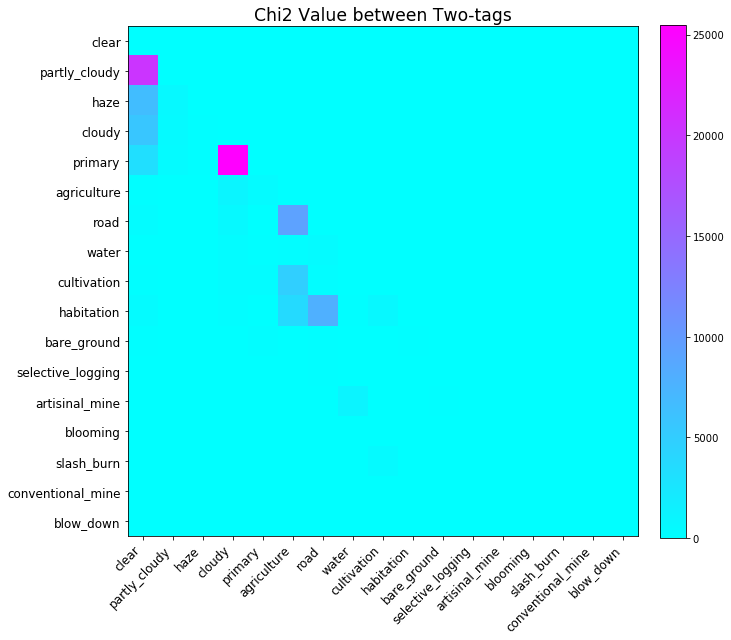

In [108]:
plot_chi2_2x2()

In [114]:
from sklearn.metrics import cohen_kappa_score
from matplotlib import cm
def plot_kappa():
    kappas = np.zeros((17,17))
    for i in range(17):
        for j in range(17):
            kappas[i, j] = cohen_kappa_score(Y[:, i], Y[:, j])

    pos = np.arange(17)
    tags = [inv_label_map[i] for i in range(17)]
    fig, ax = plt.subplots(figsize=(10,10), edgecolor='r')
    im = ax.imshow(kappas, cmap=cm.RdBu_r)
    ax.set_xticks(pos)
    ax.set_xticklabels(tags, rotation=45, size='large', horizontalalignment='right', verticalalignment='top')
    ax.set_yticks(pos)
    ax.set_yticklabels(tags, size='large')
    ax.set_title("Kappa Value between Two-tags", size='xx-large')
    im.set_clim(-1, 1)
    fig.colorbar(im, fraction=0.046, pad=0.04)

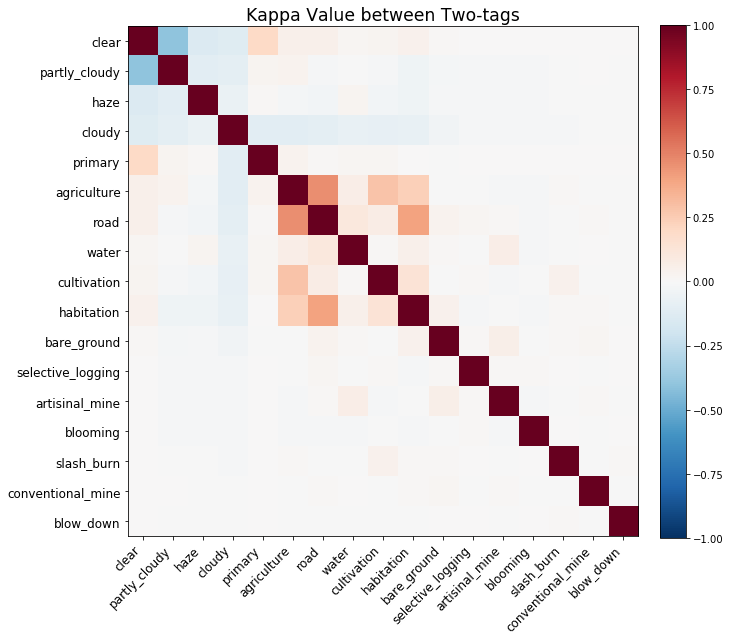

In [115]:
plot_kappa()

12338
3377


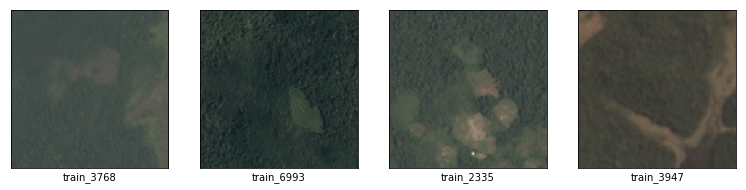

In [96]:
plot_tags_sample(ydf, ['agriculture','cultivation'], 4)

4477


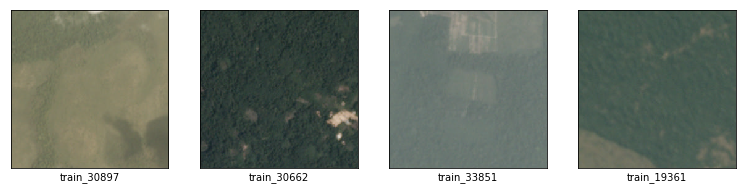

In [95]:
plot_tags_sample(ydf, ['cultivation'], 4)

In [85]:
def plot_samples(Y, nrow, st):
    ncol = 4
    fig, axes = plt.subplots(nrow, ncol, figsize=(13, 15), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.3, wspace=0.03)

    for i in range(0, nrow):
        files = train_set.loc[Y[:, i+st] == 1, 'image_name'].sample(ncol)
        for j in range(ncol):
            ax = axes[i, j]
            f = files.values[j]
            img = cv2.imread(mt.wd + 'train-jpg/{0}.jpg'.format(f))
            ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            ax.set_title('{}\n{}'.format(inv_label_map[i+st], f))

def plot_tags_sample(ydf, labels, ncol, path='train'):
    fig, axes = plt.subplots(1, ncol, figsize=(13, 4), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.3)
    
    mask = np.ones(ydf.shape[0]).astype('bool')
    for label in labels:
        mask = mask & (ydf[label] == 1)
        print(mask.sum())
    if path=='train':
        t_set = mt.train_set
    elif path == 'test':
        t_set = mt.test_set
    if mask.sum() <= ncol:
        files = t_set.loc[mask, 'image_name'].sample(ncol, replace=True)
    else:
        files = t_set.loc[mask, 'image_name'].sample(ncol)
    for j in range(ncol):
        img = cv2.imread(mt.wd + '{0}-jpg/{1}.jpg'.format(path, files.values[j]), 1)
        axes[j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[j].set_xlabel(files.values[j])

372
0


ValueError: a must be greater than 0

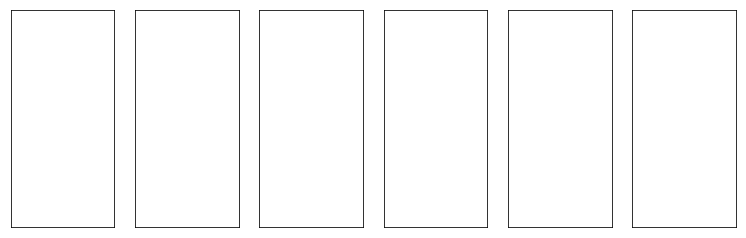

In [94]:
plot_tags_sample(subt5_df, ['artisinal_mine', 'blooming'], 6, path='test')

In [75]:
ydf

clear  partly_cloudy  haze  cloudy  primary  agriculture  road  water  \
0          0              0     1       0        1            0     0      0   
1          1              0     0       0        1            1     0      1   
2          1              0     0       0        1            0     0      0   
3          1              0     0       0        1            0     0      0   
4          1              0     0       0        1            1     1      0   
5          0              0     1       0        1            0     0      1   
6          1              0     0       0        1            1     0      1   
7          0              0     1       0        1            0     0      0   
8          1              0     0       0        1            1     0      0   
9          1              0     0       0        1            1     1      0   
10         1              0     0       0        1            1     0      1   
11         1              0     0       0        1            0     0      1   
12         0              0     0       1        0            0     0      0   
13         1              0     0       0        1            0     0      0   
14         0              0     0       1        0            0     0      0   
15         1              0     0       0        1            0     0      0   
16         1              0     0       0        1            0     0      0   
17         0              1     0       0        1            0     0      0   
18         1              0     0       0        1            0     0      0   
19         1              0     0       0        1            1     1      0   
20         1              0     0       0        1            1     0      1   
21         1              0     0       0        1            0     1      1   
22         0              1     0       0        1            0     0      0   
23         1              0     0       0        1            1     1      0   
24         0              1     0       0        1            0     0      0   
25         1              0     0       0        1            0     0      0   
26         0              0     0       1        0            0     0      0   
27         0              1     0       0        1            1     0      1   
28         1              0     0       0        1            0     0      0   
29         0              1     0       0        1            0     0      0   
...      ...            ...   ...     ...      ...          ...   ...    ...   
40449      1              0     0       0        1            0     0      1   
40450      0              1     0       0        1            1     1      0   
40451      1              0     0       0        1            0     0      0   
40452      1              0     0       0        1            0     0      0   
40453      1              0     0       0        1            0     0      0   
40454      1              0     0       0        1            0     0      0   
40455      0              1     0       0        1            1     1      0   
40456      1              0     0       0        1            0     0      0   
40457      1              0     0       0        1            0     1      1   
40458      1              0     0       0        1            1     1      0   
40459      1              0     0       0        1            0     0      1   
40460      1              0     0       0        1            0     0      0   
40461      0              0     0       1        0            0     0      0   
40462      1              0     0       0        1            0     0      0   
40463      0              0     1       0        1            1     0      0   
40464      0              1     0       0        1            1     1      0   
40465      1              0     0       0        1            0     0      0   
40466      1              0     0       0        1            0     0      0   
40467  

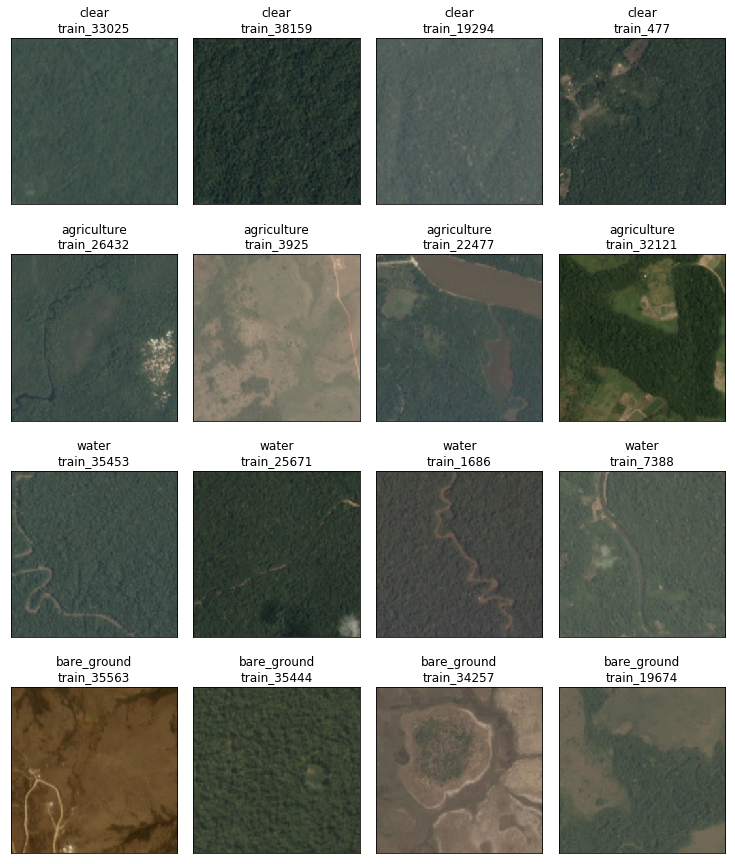

In [170]:
np.random.seed(1)
plot_samples(Y, 4, 0)

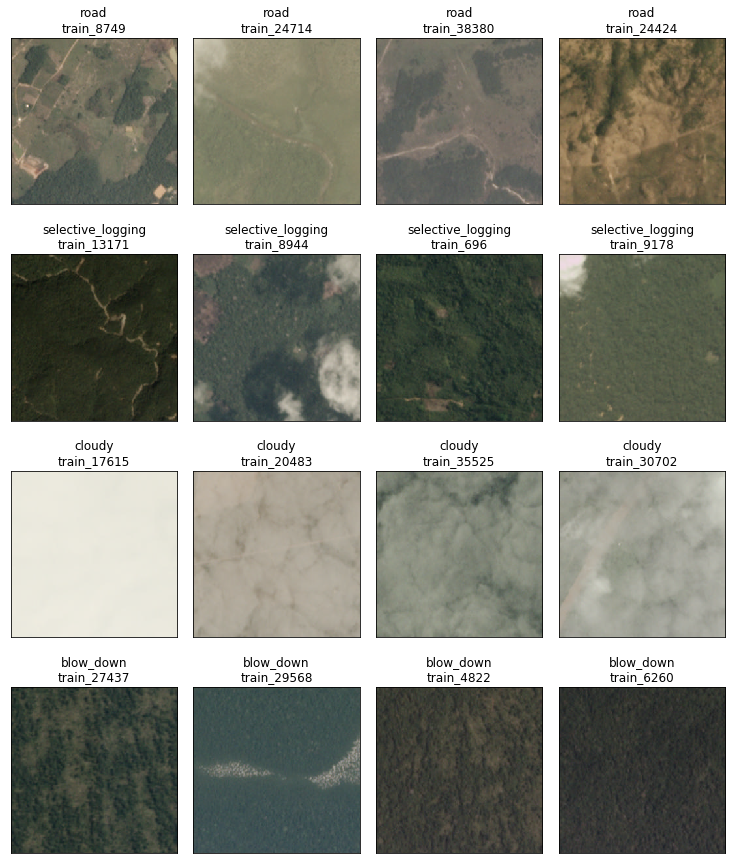

In [172]:
plot_samples(Y, 4, 8)

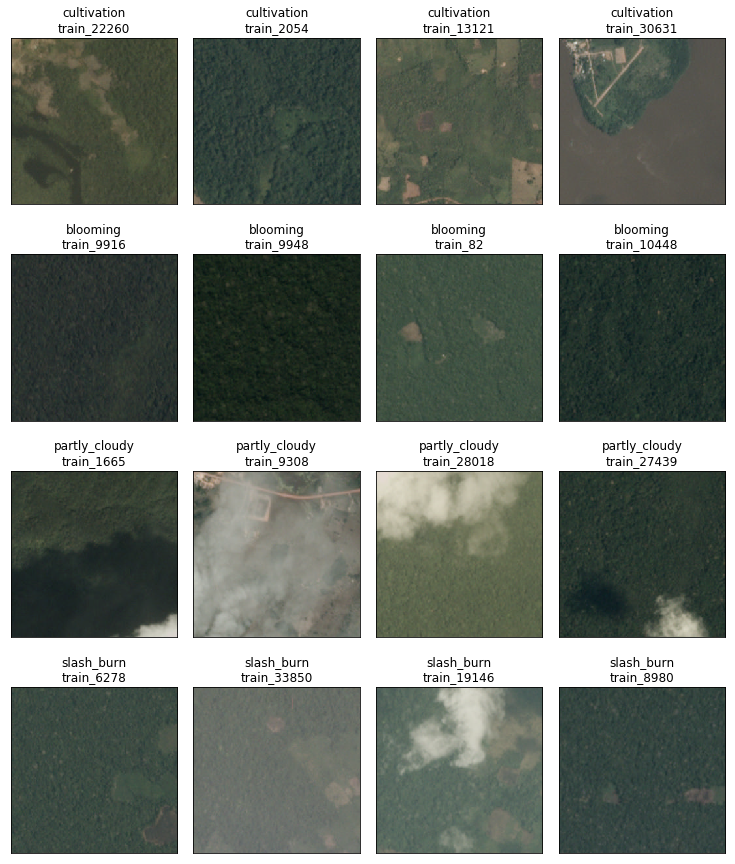

In [173]:
plot_samples(Y, 4, 12)

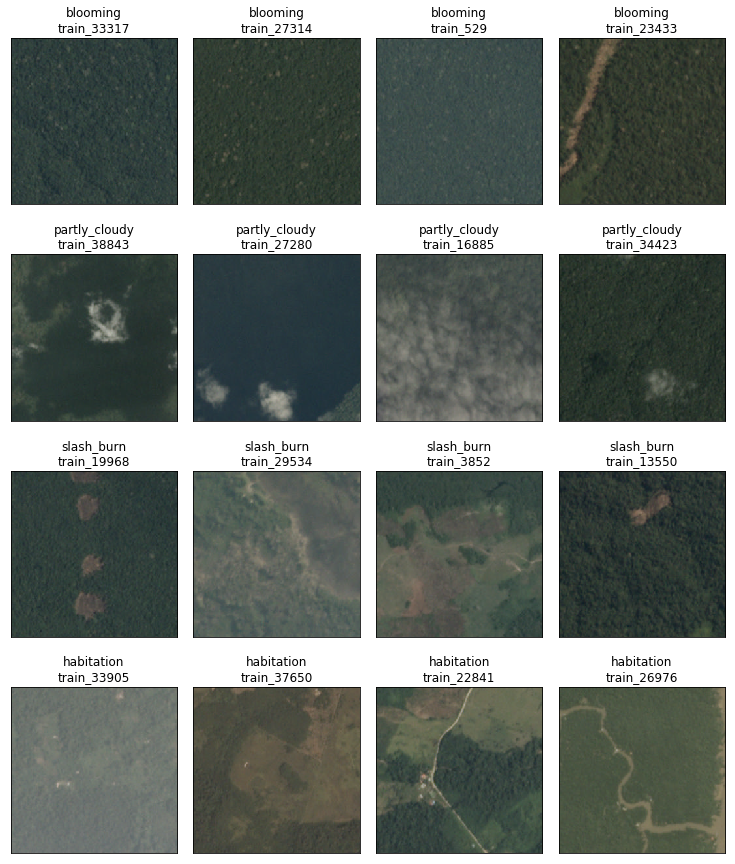

In [175]:
np.random.seed(2)
plot_samples(Y, 4, 13)

In [ ]:
seed = 7
np.random.seed(seed)

filepath="checkpoints/weightedclasses_1000epoch_512batchsize_adam.hdf5"

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.3, 
                                                  random_state=seed)
class_weight =y_train.shape[0] / (y_train.shape[1] * y_train.sum(axis=0, dtype=np.float))
class_weight = label_map = {i: l for i, l in enumerate(class_weight)}
print(class_weight)

model = create_model_2()
print(model.summary())

history = model.fit(X_train, y_train,
    shuffle=True,
    batch_size=512,
    epochs=1000,
    validation_data=(X_val, y_val),
    callbacks=callbacks_list,
    class_weight=class_weight,
    verbose=2)
scores = model.evaluate(X_val, y_val, verbose=0)
print("F2: %.2f%%" % (scores[1]*100))

In [194]:
def compile_binary_model():
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(pic_size[0], pic_size[1], 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=[f2_score])
    print(model.summary())
    return model

def create_binary_model(dropout_ratio=0.2):
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                     input_shape=(64, 64, 3), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss ='mse', optimizer = 'adam', metrics=['Accuracy', 'f2_score'])
    return model

def compile_binary_model1():
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(32, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='mse',
                  optimizer='adam',
                  metrics=['binary_accuracy', my_f2_score])
    return model



In [8]:
import matplotlib.pyplot as plt
%matplotlib inline



In [197]:
# for iy in range(17):
iy = 2
indices_1 = np.where(train_y[:,iy] == 1)[0]
if indices_1.shape[0] < train_y.shape[0] / 2:
    indices_0 = np.random.choice(np.where(train_y[:,iy] == 0)[0], indices_1.shape[0], replace=False)
else:
    indices_0 = np.where(train_y[:,iy] == 0)[0]
    indices_1 = np.random.choice(np.where(train_y[:,iy] == 1)[0], indices_0.shape[0], replace=False)

indices = np.concatenate((indices_0, indices_1))
np.random.shuffle(indices)
print('class {0} has {1} samples.'.format(inv_label_map[iy], indices.shape[0]))

# filepath="checkpoints/weights.best.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_f2_score', verbose=0, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

X_train, X_val, y_train, y_val = train_test_split(train_x[indices], train_y[indices, iy], test_size=0.3, 
                                                  random_state=seed)
model = compile_binary_model1()
print(model.summary())

history = model.fit(X_train, y_train,
    shuffle=True,
    batch_size=512,
    epochs=30,
    validation_data=(X_val, y_val),
#     callbacks=callbacks_list,
    verbose=2)
scores = model.evaluate(X_val, y_val, verbose=0)
print("Acc: %.2f%%" % (scores[1]*100))

class slash_burn has 418 samples.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_243 (Conv2D)          (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_183 (MaxPoolin (None, 31, 31, 8)         0         
_________________________________________________________________
dropout_238 (Dropout)        (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_244 (Conv2D)          (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_184 (MaxPoolin (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_239 (Dropout)        (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_56 (Flatten)         (None, 3136) 

In [187]:
print(y_val[0:20])
#pred = model.predict(X_val, batch_size=128, verbose=2)
print((pred>0.4).astype(np.uint8)[0:20])

[0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1]
[[0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]]


In [206]:
from sklearn.metrics import make_scorer, fbeta_score

def my_f2_score_for_numpy(y_true, y_pred):
    y_pred = y_pred.astype('float') > 0.3
    return fbeta_score(y_true, y_pred, beta=2, average='samples')

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

def create_model(dropout_ratio=0.2):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu', padding='same'))
    model.add(Dropout(dropout_ratio))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(dropout_ratio))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(dropout_ratio))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(dropout_ratio))
    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(dropout_ratio))
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(dropout_ratio))
    model.add(Dense(17, activation='sigmoid'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=[my_f2_score])
    return model

def create_model_1():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                     input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(17, activation='sigmoid'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=[my_f2_score])
    return model

def create_model_2():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                     input_shape=(64, 64, 3), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(17, activation='sigmoid'))
    model.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics=[my_f2_score])
    return model

In [151]:
from functools import partial


{0: 0.19313611887396906, 1: 2.8346338535414164, 2: 11.261923688394276, 3: 24.511245674740483, 4: 0.32541286721639068, 5: 0.52446969977418278, 6: 0.29673574966750099, 7: 7.0032130499258525, 8: 0.88188608776844069, 9: 0.32979119625689612, 10: 27.324011571841851, 11: 6.7480352464872588, 12: 7.310371517027864, 13: 1.0126152526624259, 14: 0.06293715613345742, 15: 0.64854657816433969, 16: 0.084414520429594977}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_203 (Conv2D)          (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_146 (MaxPoolin (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_189 (Dropout)        (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 32, 32, 32)        4640     

NameError: name 'self' is not defined

In [ ]:
test_x = get_test_x(train_set)
pred = model.predict(batch_size=512, verbose=2)

In [205]:
train_x.shape

(40479, 64, 64, 3)

In [157]:
class_weight

{0: 0.19313611887396906,
 1: 2.8346338535414164,
 2: 11.261923688394276,
 3: 24.511245674740483,
 4: 0.32541286721639068,
 5: 0.52446969977418278,
 6: 0.29673574966750099,
 7: 7.0032130499258525,
 8: 0.88188608776844069,
 9: 0.32979119625689612,
 10: 27.324011571841851,
 11: 6.7480352464872588,
 12: 7.310371517027864,
 13: 1.0126152526624259,
 14: 0.06293715613345742,
 15: 0.64854657816433969,
 16: 0.084414520429594977}

In [100]:
pred = model.predict(X_val, batch_size=128, verbose=2)
print(pred)

[[  4.57262126e-04   1.15336150e-06   1.01887951e-11 ...,   9.99999046e-01
    2.71634326e-05   9.99998808e-01]
 [  4.69761930e-04   5.71556541e-07   1.12786360e-11 ...,   9.99999285e-01
    2.76409028e-05   9.99999285e-01]
 [  8.49372242e-04   1.22498545e-06   4.77129759e-11 ...,   9.99998212e-01
    5.33281382e-05   9.99998450e-01]
 ..., 
 [  5.12096822e-01   4.74027365e-01   5.85603702e-05 ...,   7.45701969e-01
    5.19355247e-03   7.00783789e-01]
 [  2.47501861e-03   1.69417763e-05   9.29364363e-10 ...,   9.99901891e-01
    2.23993120e-04   9.99701917e-01]
 [  2.61999480e-02   2.54059287e-05   1.45027752e-06 ...,   9.99999285e-01
    2.18111221e-04   2.49117787e-04]]


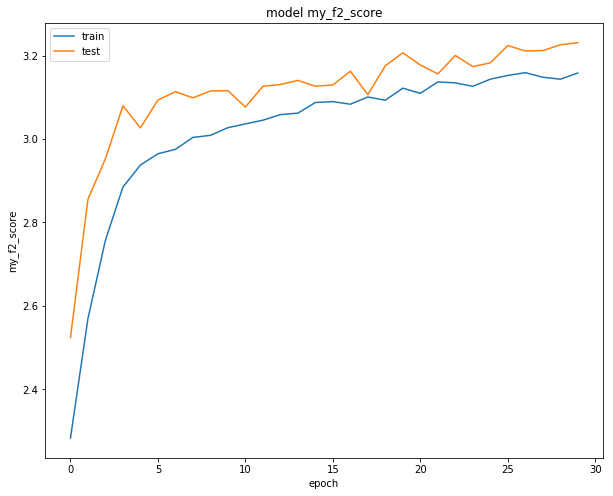

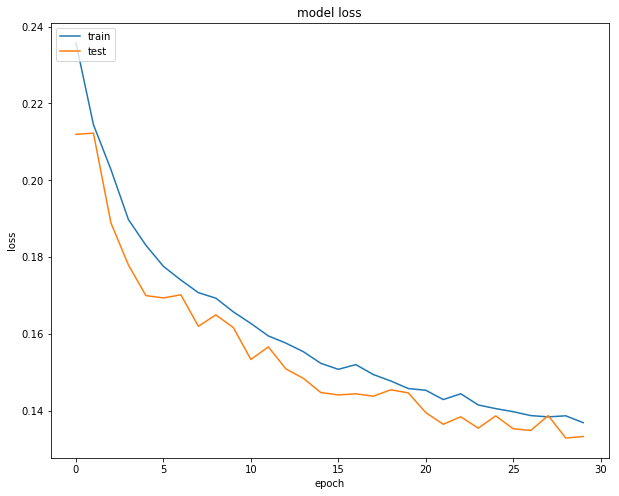

In [183]:
plot_learning_curve(history, 'my_f2_score')
plot_learning_curve(history, 'loss')

In [65]:
from sklearn.metrics import make_scorer, fbeta_score

def my_f2_score(y_true, y_pred):
    val = np.zeros(17) + 0.3 # 0.2=0.5-0.3, 0.3 is what i need
    shift = K.variable(value=val) 
    shifted_y_pred = tf.add(y_pred, shift)
    return f2_score(y_true, shifted_y_pred)

def my_f2_score_for_numpy(y_true, y_pred):
    print(y_true)
    print(y_pred)
    y_pred = y_pred.astype('float') > 0.3
    return fbeta_score(y_true, y_pred, beta=2, average='samples')

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

def create_model(dropout_ratio=0.2):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu', padding='same'))
    model.add(Dropout(dropout_ratio))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(dropout_ratio))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(dropout_ratio))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(dropout_ratio))
    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(dropout_ratio))
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(dropout_ratio))
    model.add(Dense(17, activation='sigmoid'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=[my_f2_score])
    return model

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score
import new

f2_scorer = make_scorer(my_f2_score_for_numpy)

seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=128, verbose=2)
model.score = new.instancemethod(func,foo,Foo)
# epochs = [50, 100, 150]
# batches = [64, 128, 256]
# dropout_ratios = [0.2, 0.3, 0.5]
epochs = [1]
batches = [128]
dropout_ratios = [0.5]
param_grid = dict(epochs=epochs, batch_size=batches, dropout_ratio=dropout_ratios)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=f2_scorer, cv=2)
grid_result = grid.fit(train_x, train_y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/1
30s - loss: 5.7266 - my_f2_score: 0.6993
[[0 0 0 ..., 1 0 0]
 [1 0 0 ..., 1 0 1]
 [0 0 0 ..., 1 0 1]
 ..., 
 [0 0 0 ..., 1 0 1]
 [0 0 0 ..., 1 0 1]
 [0 0 0 ..., 0 0 0]]
[14 14 14 ..., 14 14 14]


ValueError: Can't handle mix of multilabel-indicator and binary

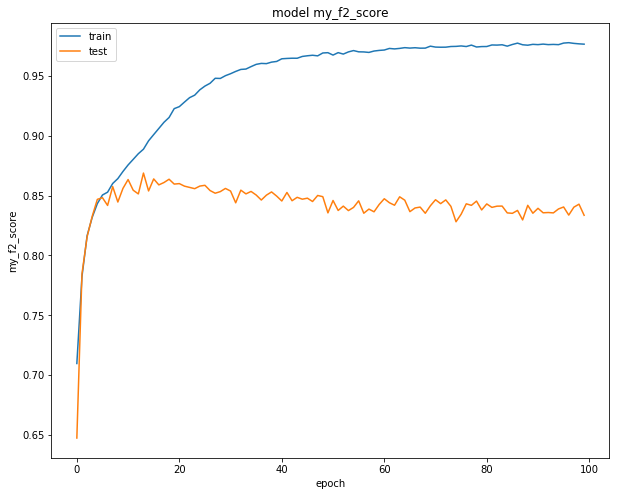

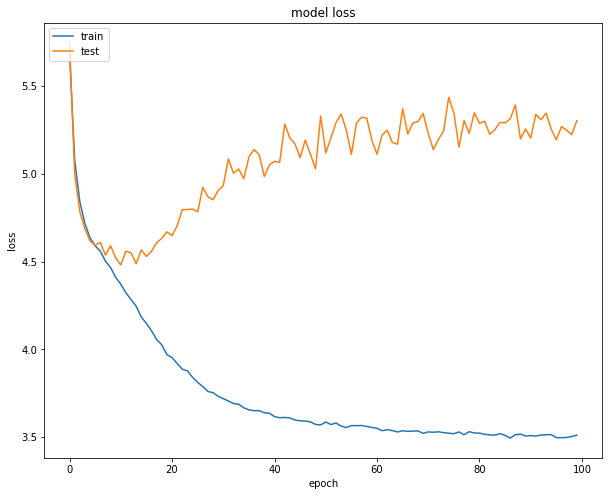

In [28]:
plot_learning_curve(history, 'my_f2_score')
plot_learning_curve(history, 'loss')

In [64]:
fbeta_score(y_val, pred > 0.2, beta=2, average='samples')

0.79159738866050589

In [177]:
y_val[3]

1

In [178]:
(pred>0.1).astype(np.uint8)[3]

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=uint8)

In [73]:
dir(model)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_inbound_node',
 '_built',
 '_feed_input_names',
 '_feed_inputs',
 '_fit_loop',
 '_flattened_layers',
 '_gather_list_attr',
 '_get_deduped_metrics_names',
 '_get_node_attribute_at_index',
 '_initial_weights',
 '_make_predict_function',
 '_make_test_function',
 '_make_train_function',
 '_output_mask_cache',
 '_output_shape_cache',
 '_output_tensor_cache',
 '_predict_loop',
 '_standardize_user_data',
 '_test_loop',
 '_trainable',
 '_updated_config',
 'add',
 'add_loss',
 'add_update',
 'add_weight',
 'assert_input_compatibility',
 'build',
 'built',
 'call',
 'compile',
 'compute_mask',
 'compute_output_shape',
 'constraints',
